## LSTM for lag
Copied from https://cmsdk.com/python/lstm--learn-a-simple-lag-in-the-data.html

In [1]:
# import os
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
import keras
def strided_app(a, L, S ):  #To get X in the right format expected by Keras
    nrows = ((a.size-L)//S)+1
    n = a.strides[0]
    return np.lib.stride_tricks.as_strided(a, shape=(nrows,L), strides=(S*n,n))

Using TensorFlow backend.


In [2]:
nb_samples = 100000
X = np.random.randn(nb_samples)
timesteps = 3
Beta = np.zeros(timesteps)
Beta[1] = 1
X_model = strided_app(X, timesteps, 1)
Y_model = np.dot(X_model, Beta)
X_calib = strided_app(X, timesteps, 1)
Y_calib = Y_model[:X_calib.shape[0]]
X_calib = X_calib.reshape(X_calib.shape[0], timesteps, 1)
nb_samples_calib = X_calib.shape[0]
nb_train = int(nb_samples_calib * 0.7)
nb_val = int(nb_samples_calib * 0.85)
X_train = X_calib[: nb_train]
X_validation = X_calib[nb_train : nb_val]
X_test = X_calib[nb_val:]
Y_train = Y_calib[: nb_train]
Y_validation = Y_calib[nb_train : nb_val]
Y_test = Y_calib[nb_val:]

In [3]:
model = Sequential()
model.add(LSTM(input_dim = X_train.shape[2],
               output_dim =10,
               activation='tanh', stateful=False
              )
        )
model.add(Dropout(0.25))
model.add(Dense(output_dim=1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

/home/ubuntu/.local/share/virtualenvs/G2ML/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
/home/ubuntu/.local/share/virtualenvs/G2ML/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=10, activation="tanh", stateful=False, input_shape=(None, 1))`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


/home/ubuntu/.local/share/virtualenvs/G2ML/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="linear")`
  


In [4]:
callbacks=[]
#weights_path = 'weights.h5'
#early_stopping = EarlyStopping(monitor='val_loss',
#                           patience=100)
#checkpointer = ModelCheckpoint(filepath=weights_path,
#                           verbose=2,
#                           save_best_only=True)
#callbacks = [early_stopping, checkpointer]
history = model.fit(X_train,
                    Y_train,
                    nb_epoch = 10000,
                    callbacks = callbacks,
                    verbose = 2,
                    batch_size = 100,
                    validation_data = (X_validation,
                                       Y_validation),
                    shuffle = True)

/home/ubuntu/.local/share/virtualenvs/G2ML/lib/python3.5/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 69998 samples, validate on 15000 samples
Epoch 1/10000
2s - loss: 0.4029 - val_loss: 0.0166
Epoch 2/10000
2s - loss: 0.0587 - val_loss: 0.0055
Epoch 3/10000
2s - loss: 0.0482 - val_loss: 0.0033
Epoch 4/10000
2s - loss: 0.0458 - val_loss: 0.0020
Epoch 5/10000
2s - loss: 0.0437 - val_loss: 0.0037
Epoch 6/10000
2s - loss: 0.0419 - val_loss: 0.0030
Epoch 7/10000
2s - loss: 0.0406 - val_loss: 0.0022
Epoch 8/10000
2s - loss: 0.0397 - val_loss: 0.0025
Epoch 9/10000
2s - loss: 0.0393 - val_loss: 0.0021
Epoch 10/10000
2s - loss: 0.0380 - val_loss: 0.0029
Epoch 11/10000
2s - loss: 0.0374 - val_loss: 0.0035
Epoch 12/10000
2s - loss: 0.0380 - val_loss: 0.0013
Epoch 13/10000
2s - loss: 0.0371 - val_loss: 0.0028
Epoch 14/10000
2s - loss: 0.0377 - val_loss: 0.0028
Epoch 15/10000
2s - loss: 0.0367 - val_loss: 0.0022
Epoch 16/10000
2s - loss: 0.0362 - val_loss: 0.0011
Epoch 17/10000
2s - loss: 0.0361 - val_loss: 0.0013
Epoch 18/10000
2s - loss: 0.0355 - val_loss: 0.0016
Epoch 19/10000
2s - los

2s - loss: 0.0339 - val_loss: 0.0033
Epoch 155/10000
2s - loss: 0.0335 - val_loss: 6.7803e-04
Epoch 156/10000


KeyboardInterrupt: 

X (69998, 3, 1) Y (69998,) pred (69998, 1)
reshaped pred (69998,)


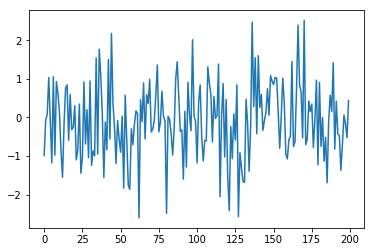

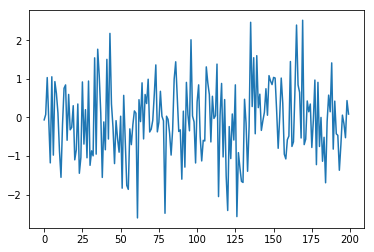

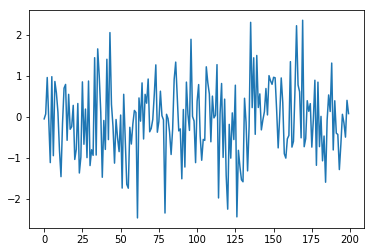

0.996059362266
X (15000, 3, 1) Y (15000,) pred (15000, 1)
reshaped pred (15000,)


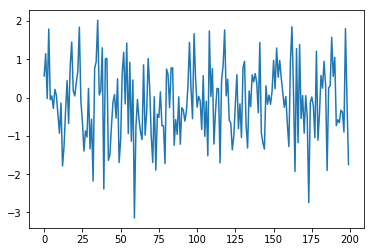

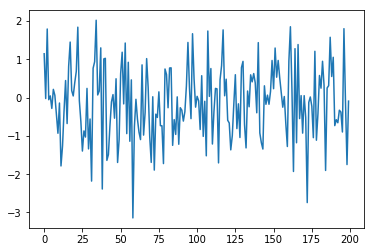

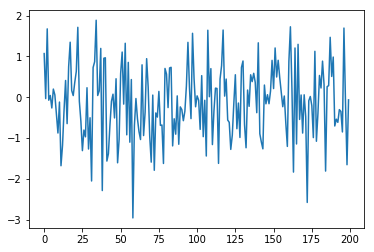

0.996074798653
X (15000, 3, 1) Y (15000,) pred (15000, 1)
reshaped pred (15000,)


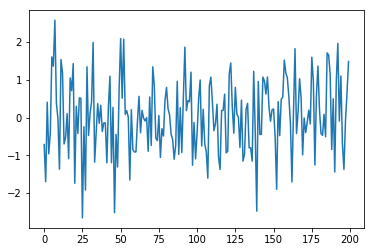

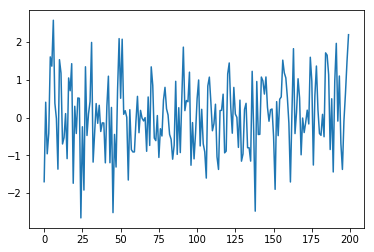

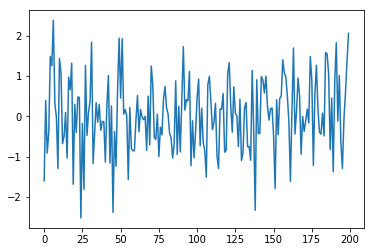

0.996111135693


In [13]:
from matplotlib import pyplot as plt
def myPlot(X):
    plt.plot(X)
    plt.show()

#def R2(X, Y, model):
#    Y_mean = np.mean(Y, axis=0)
#    pred = model.predict(X)
#    res = np.sum(np.square(Y - pred))
#    tot = np.sum(np.square(Y - Y_mean))
#    r2 = 1 - res / tot
#    return r2

def R2(X, Y, model):
    Y_mean = np.mean(Y, axis=0)
    pred = model.predict(X)
    print('X', X.shape, 'Y', Y.shape, 'pred', pred.shape)
    pred = pred.reshape(Y.shape[0])
    print('reshaped pred', pred.shape)
    res = np.sum(np.square(Y - pred))
    tot = np.sum(np.square(Y - Y_mean))
    r2 = 1 - res / tot
    myPlot(X[:200,0])
    myPlot(Y[:200])
    myPlot(pred[:200])
    return r2

#model.load_weights(weights_path)
print(R2(X_train, Y_train, model))
print(R2(X_validation, Y_validation, model))
print(R2(X_test, Y_test, model))